## Importing Necessary Libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format

In [2]:
# Def for value_labels in barcharts

# This def is imported: https://www.statology.org/seaborn-barplot-show-values/
#It saves time to show label values in a seaborn barchart  

def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height() * 0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height() * 0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)
        
# When you want to use this df for a horizontal barchart (seaborn) You should write like this: 
#shows_values(df_name,"h")
# The "h" is important for the def to understand it is horizontal. By default it will understand it is vertical. default typing is: 
#shows_values(df_name)

## Importing and Analyzing the datasets (titles.csv, credits.csv)

In [3]:
#IMporting the titles dataset

titles = pd.read_csv('titles.csv')
credits = pd.read_csv('credits.csv')

In [4]:
credits.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


In [5]:
credits['role'].value_counts()

ACTOR       72690
DIRECTOR     4523
Name: role, dtype: int64

### Analyze the titles dataset

Let's take a sneek peak into the titles dataset

In [6]:
#Checking the first few rows (5) of the data

titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.00,NaN,nan,nan,0.60,nan
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],nan,tt0075314,8.30,795222.00,27.61,8.20
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],nan,tt0071853,8.20,530877.00,18.22,7.80
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],nan,tt0079470,8.00,392419.00,17.50,7.80
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],nan,tt0070047,8.10,391942.00,95.34,7.70


In [7]:
# Checking the dimension of our data

titles.shape

(5806, 15)

In [8]:
titles.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [9]:
titles.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5806.00,5806.00,2047.00,5283.00,5267.00,5712.00,5488.00
mean,2016.01,77.64,2.17,6.53,23407.19,22.53,6.82
std,7.32,39.47,2.64,1.16,87134.32,68.85,1.17
min,1945.00,0.00,1.00,1.50,5.00,0.01,0.50
25%,2015.00,44.00,1.00,5.80,521.00,3.16,6.10
50%,2018.00,84.00,1.00,6.60,2279.00,7.48,6.90
75%,2020.00,105.00,2.00,7.40,10144.00,17.78,7.50
max,2022.00,251.00,42.00,9.60,2268288.00,1823.37,10.00


In [10]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   description           5788 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
 13  tmdb_popularity       5712 non-null   float64
 14  tmdb_score            5488 non-null   float64
dtypes: float64(5), int64(

In [11]:
#Checking for NUll Values and arranging them in order of magnitude

titles.isnull().sum().sort_values(ascending = False)

seasons                 3759
age_certification       2610
imdb_votes               539
imdb_score               523
imdb_id                  444
tmdb_score               318
tmdb_popularity           94
description               18
title                      1
production_countries       0
genres                     0
runtime                    0
release_year               0
type                       0
id                         0
dtype: int64

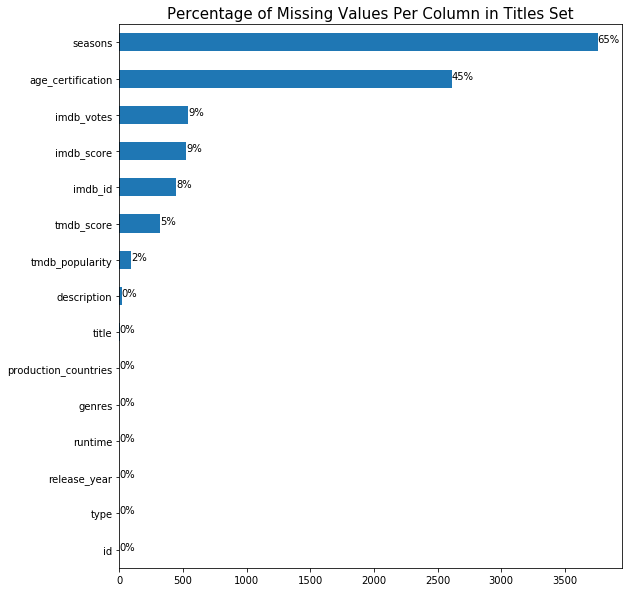

In [12]:
# Plot missing values in titles set
ax = titles.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Titles Set', fontdict = {'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/titles.shape[0]) * 100)
    width, height = p.get_width(), p.get_height()
    x = p.get_x() + width + 0.02
    y = p.get_y() + height/2
    ax.annotate(percentage, (x, y))

# Data Exploration and Preprocessing

In [13]:
titles.type.value_counts()

MOVIE    3759
SHOW     2047
Name: type, dtype: int64

Let's try to sort out the data set according to the type i.e shows and movies

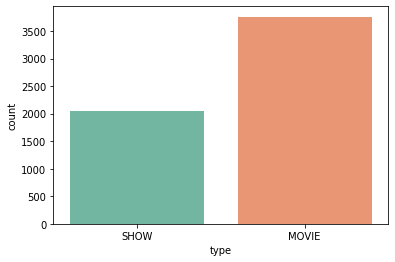

In [14]:
ax = sns.countplot(x="type", data=titles, palette="Set2")

In [15]:
shows = titles[titles.type == "SHOW"]
movies = titles[titles.type == "MOVIE"]

In [16]:
movies.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],nan,tt0075314,8.30,795222.00,27.61,8.20
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],nan,tt0071853,8.20,530877.00,18.22,7.80
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],nan,tt0079470,8.00,392419.00,17.50,7.80
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],nan,tt0070047,8.10,391942.00,95.34,7.70
6,tm14873,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102,"['thriller', 'crime', 'action']",['US'],nan,tt0066999,7.70,153463.00,14.74,7.50


In [17]:
movies.shape, shows.shape

((3759, 15), (2047, 15))

In [18]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3759 entries, 1 to 5804
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3759 non-null   object 
 1   title                 3758 non-null   object 
 2   type                  3759 non-null   object 
 3   description           3751 non-null   object 
 4   release_year          3759 non-null   int64  
 5   age_certification     1406 non-null   object 
 6   runtime               3759 non-null   int64  
 7   genres                3759 non-null   object 
 8   production_countries  3759 non-null   object 
 9   seasons               0 non-null      float64
 10  imdb_id               3451 non-null   object 
 11  imdb_score            3407 non-null   float64
 12  imdb_votes            3391 non-null   float64
 13  tmdb_popularity       3698 non-null   float64
 14  tmdb_score            3573 non-null   float64
dtypes: float64(5), int64(

Using Wordcloud to find some common word in the titles

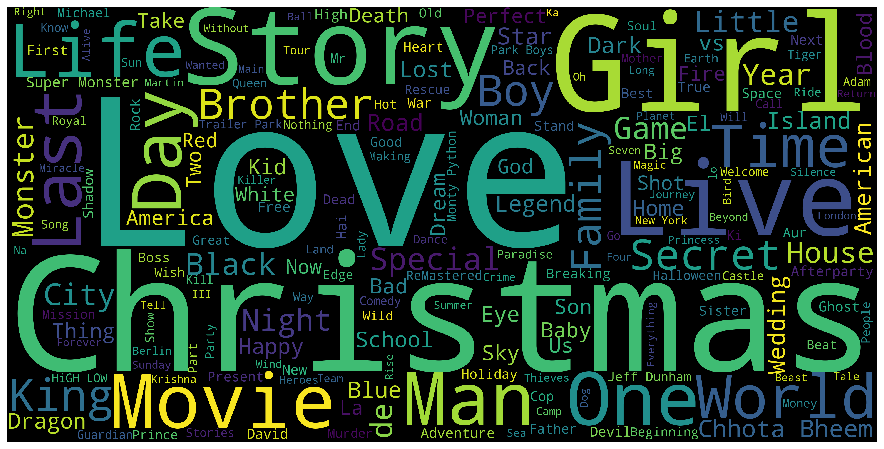

In [19]:
# Import new libraries

%matplotlib inline
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Create a wordcloud of the movie titles
movies['title'] = movies['title'].fillna("").astype('str')
title_corpus = ' '.join(movies['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

In [20]:
#Estimating the percentage of missing values in each column

total = movies.isnull().sum().sort_values(ascending = False)
percentage = ((movies.isnull().sum()/movies.isnull().count()).sort_values(ascending = False) * 100)
missing_data = pd.concat([total, percentage], axis = 1, keys = ['Total', 'Percentage'])
missing_data.head(20)

,Total,Percentage
seasons,3759,100.00
age_certification,2353,62.60
imdb_votes,368,9.79
imdb_score,352,9.36
imdb_id,308,8.19
tmdb_score,186,4.95
tmdb_popularity,61,1.62
description,8,0.21
production_countries,0,0.00
genres,0,0.00


In [21]:
#Checking for Null Values and arranging them in order of magnitude

movies.isnull().sum().sort_values(ascending = False)

seasons                 3759
age_certification       2353
imdb_votes               368
imdb_score               352
imdb_id                  308
tmdb_score               186
tmdb_popularity           61
description                8
production_countries       0
genres                     0
runtime                    0
release_year               0
type                       0
title                      0
id                         0
dtype: int64

The seasons column contain null values all through. 

***WHY????***

Yes, it's quite logical for movies not to have seasons unlike TVShows that's why we have the season column for movies be empty

In [22]:
# It's logical for movies not to have seasons unlike TVShows that's why we have the season column for movies be empty
# So we will just have to drop the season column

movies = movies.drop('seasons', axis = 1)

In [23]:
# Drop nulls on scores & pop
movies_clean = movies.dropna(subset=['imdb_id','imdb_score','imdb_votes','tmdb_popularity','tmdb_score'])
movies_clean.isnull().sum()

id                         0
title                      0
type                       0
description                1
release_year               0
age_certification       1953
runtime                    0
genres                     0
production_countries       0
imdb_id                    0
imdb_score                 0
imdb_votes                 0
tmdb_popularity            0
tmdb_score                 0
dtype: int64

In [24]:
#Comparing the number of rows after dropping nan values with the previous shape of the movies dataframe

movies_clean.shape, movies.shape

((3255, 14), (3759, 14))

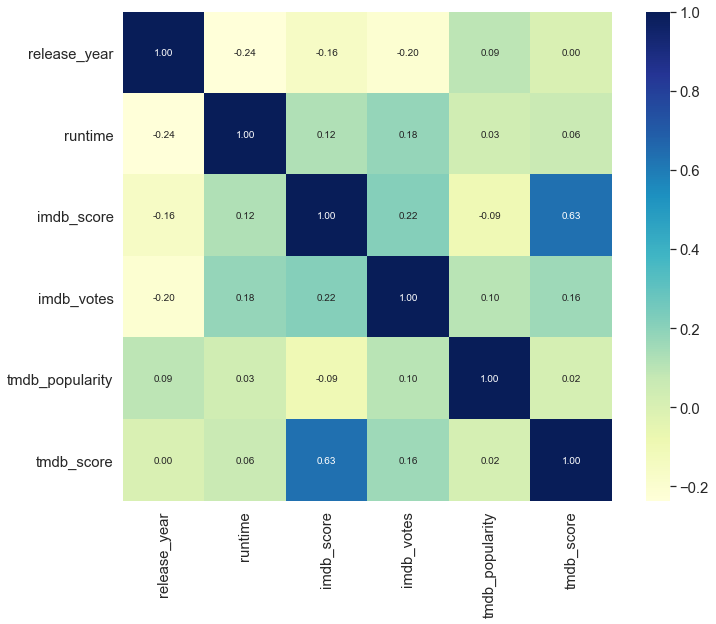

In [25]:
#Plotting the heatmap
correlations = movies_clean.corr()

#Set font size
sns.set(font_scale = 1.35)

#Set the graph size
f, ax = plt.subplots(figsize=(12, 9))
#sns.heatmap(correlations, cbar=True, annot=True, square=True, fmt= ".2f", annot_kws={"size":10,}, yticklabels = correlations.index, xticklabels = correlations.index)
sns.heatmap(correlations, cbar = True, annot = True, square = True, cmap = "YlGnBu", fmt= ".2f", annot_kws={"size":10,}, yticklabels = correlations.index, xticklabels = correlations.index )

#plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.show()

Inferences from heatmap
- !!!TO BE COMPLETED


- **"imdb_score"** seems to be quite correlated to - **"tmdb_score"** while it is also correlated 

- Check what tmbd score and imdb score is all about***

## Let's analyse some of the columns with some visualizations

In [26]:
movies_clean.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score'],
      dtype='object')

In [27]:
movies_clean.head(2)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],tt0075314,8.30,795222.00,27.61,8.20
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],tt0071853,8.20,530877.00,18.22,7.80


### release_year

In [28]:
movies_clean['release_year'].describe()

count   3255.00
mean    2015.11
std        8.31
min     1953.00
25%     2014.00
50%     2018.00
75%     2020.00
max     2022.00
Name: release_year, dtype: float64

In [29]:
movies_clean['release_year'].value_counts()

2019    443
2018    434
2021    381
2020    379
2017    367
       ... 
1978      1
1959      1
1961      1
1969      1
1985      1
Name: release_year, Length: 66, dtype: int64

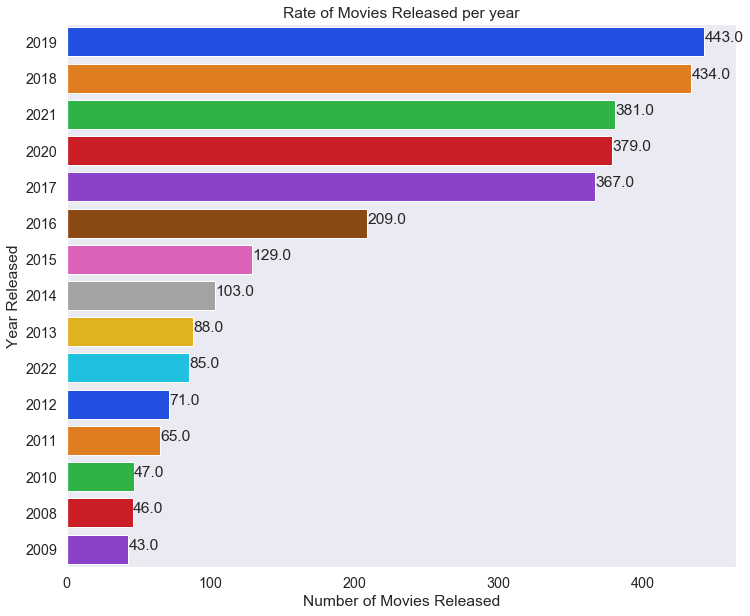

In [30]:
plt.figure(figsize = (12, 10))
sns.set(style = "dark", font_scale = 1.3)
ax = sns.countplot(y = "release_year", data = movies_clean, palette = "bright", order = movies_clean['release_year'].value_counts().index[0:15])

#Title of the Plot
plt.title('Rate of Movies Released per year')

# To show the value for each bar in the chart
show_values(ax, 'h')

#Label for the horizontal and vertical axis
plt.ylabel('Year Released')
plt.xlabel('Number of Movies Released')
plt.show()

This plot reveals that most of the movies were produced in 2019 and 2018.
The number of movies released in 2020 and 2021 reduced from the ones produced in the previous years. This is mostly because of the COVID-19 Pandemic

#### In what year do we have the most number of Netflix Movie released with date?

In [31]:
# Let's see the variation of the number of movies we have per year

#movies_per_year = pd.DataFrame()  

movies['release_year'].value_counts()

2019    540
2020    499
2018    473
2021    455
2017    397
       ... 
1963      1
1961      1
1959      1
1953      1
1977      1
Name: release_year, Length: 66, dtype: int64

In [32]:
column = ['release_year', 'total_shows']
movies_per_year = pd.DataFrame(movies['release_year'].value_counts())


movies_per_year.rename(columns = {'release_year': 'total_shows'}, inplace = True)


#movies_per_year.head()

#movies['release_year'].value_counts()

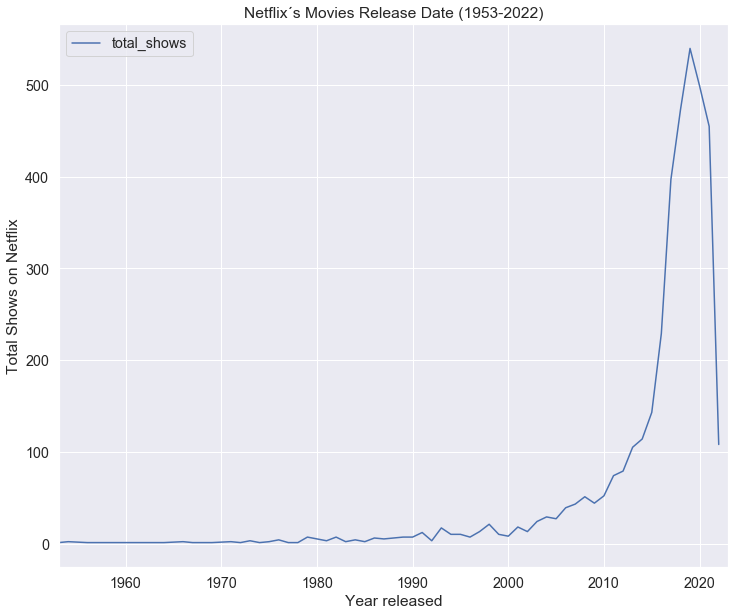

In [33]:
#Set font size
sns.set(font_scale = 1.3)

# Plotting the line graph using seaborn
plt.figure(figsize = (12, 10))
sns.lineplot(data = movies_per_year)

plt.title('Netflix´s Movies Release Date (1953-2022)')
plt.xlim(1953, 2023)
plt.xlabel('Year released')
plt.ylabel('Total Shows on Netflix')
plt.show()

Now we want to take a closer look at the years with the most shows released

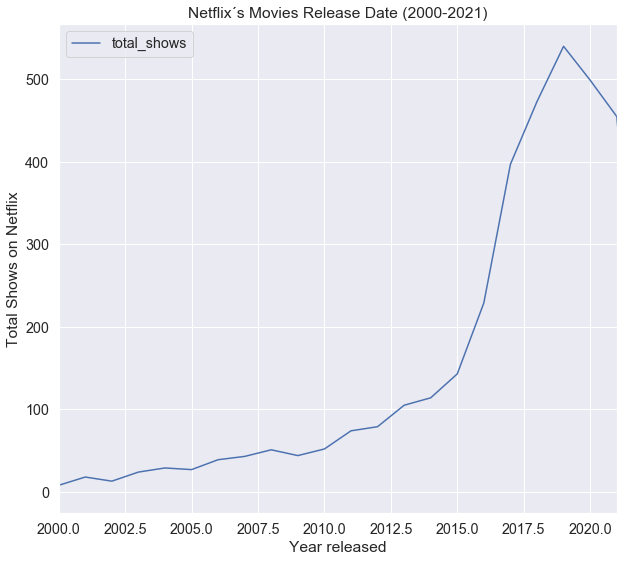

In [34]:

plt.figure(figsize=(10, 9))
sns.lineplot(data= movies_per_year)
plt.title('Netflix´s Movies Release Date (2000-2021)')
plt.xlim(2000, 2021)
plt.xlabel('Year released')
plt.ylabel('Total Shows on Netflix')
plt.show()

Comments....

### age_certification

In [35]:
movies_clean['age_certification'].value_counts()

R        545
PG-13    414
PG       235
G         95
NC-17     13
Name: age_certification, dtype: int64

In [36]:
shows['age_certification'].value_counts()

TV-MA    841
TV-14    470
TV-PG    186
TV-Y7    112
TV-Y     105
TV-G      76
Name: age_certification, dtype: int64

#### Quantity of movies per age_certification with visualization

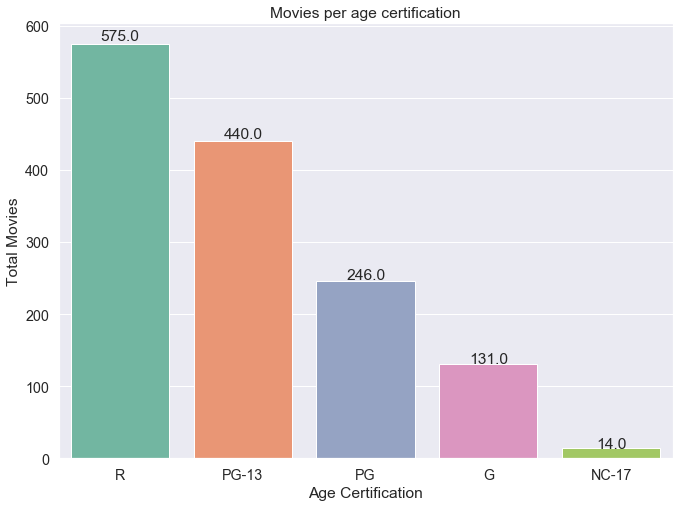

In [37]:
# The size (height, width) of the figure
plt.figure(figsize = (11, 8))

# Setting the style of the graph and the font size
sns.set(style = "darkgrid", font_scale = 1.3)

# Plotting the bar chart
ax = sns.countplot(x = "age_certification", data = movies, palette = "Set2", order = movies['age_certification'].value_counts().index)

# Title of the graph
plt.title("Movies per age certification")


# To show the value for each bar in the chart
show_values(ax)

# Title for Axes
plt.ylabel("Total Movies")
plt.xlabel("Age Certification")

plt.show()

Inference from the Bar Chart
- The age category watching the most number of movies is 

In [38]:
movies.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score'],
      dtype='object')

### Most Common Genre?

In [39]:
movies['genres'].head()

1                 ['crime', 'drama']
2              ['comedy', 'fantasy']
3                         ['comedy']
4                         ['horror']
6    ['thriller', 'crime', 'action']
Name: genres, dtype: object

In [40]:
movies['genres'].value_counts()

['comedy']                                            407
['drama']                                             240
['documentation']                                     225
['comedy', 'drama']                                    88
['comedy', 'documentation']                            88
                                                     ... 
['war', 'action', 'drama', 'scifi', 'thriller']         1
['thriller', 'comedy', 'crime', 'action', 'drama']      1
['comedy', 'family', 'romance', 'drama']                1
['romance', 'drama', 'european', 'war']                 1
['drama', 'action', 'crime', 'scifi', 'thriller']       1
Name: genres, Length: 1058, dtype: int64

In [41]:
genres_count = movies['genres'].value_counts()

In [42]:
movies['genres'].str.split('|').explode().value_counts().sort_values(ascending=False).head(10)

['comedy']                     407
['drama']                      240
['documentation']              225
['comedy', 'drama']             88
['comedy', 'documentation']     88
['drama', 'comedy']             78
['drama', 'romance']            62
['romance', 'drama']            54
['comedy', 'romance']           51
['romance', 'comedy']           47
Name: genres, dtype: int64

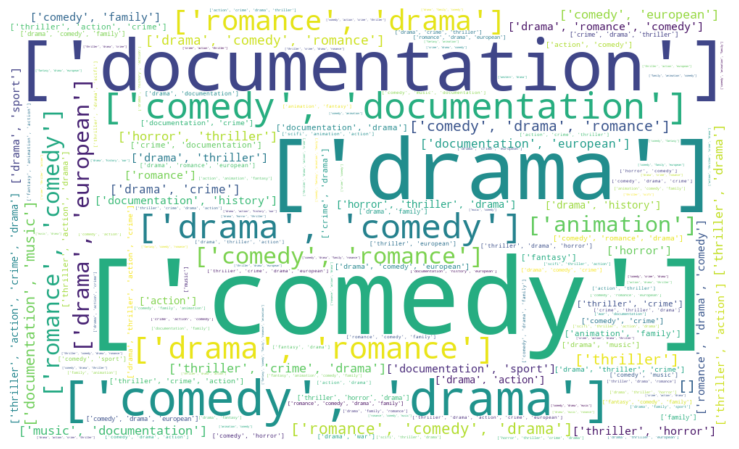

In [43]:
genre_wc = WordCloud(width=1000, height=600, background_color='white')
genre_wc.generate_from_frequencies(genres_count.to_dict())

plt.figure(figsize=(16, 8))
plt.imshow(genre_wc, interpolation="bilinear")
plt.axis('off')
plt.show()

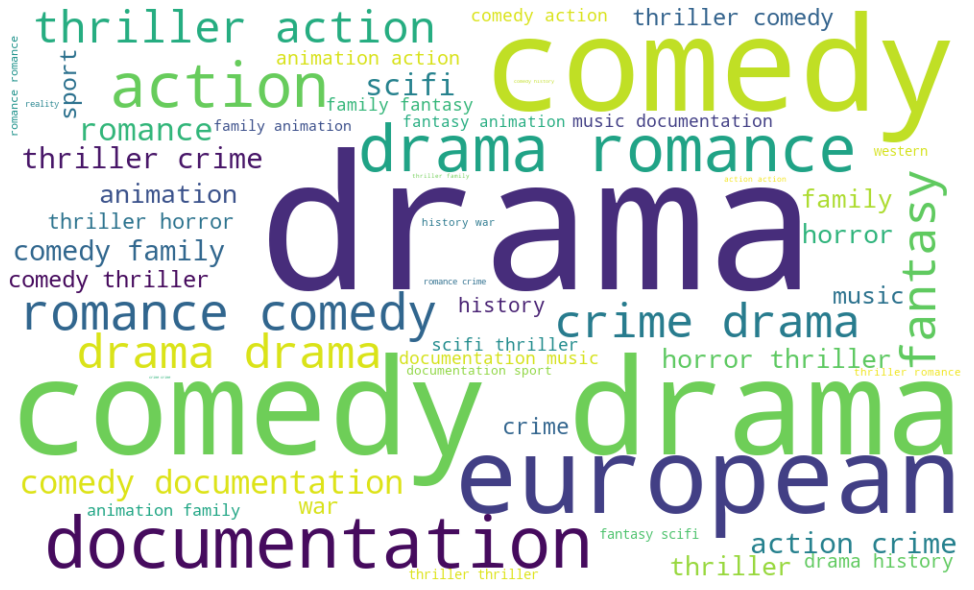

In [44]:
text = str(list(movies['genres'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')

wc = WordCloud(background_color = 'white', width = 1000,  height = 600, max_words = 150).generate(text)

plt.figure( figsize=(16, 8))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [45]:
#text

### AVG Runtime?

In [46]:
movies['runtime'].describe()

count   3759.00
mean      98.79
std       30.83
min        3.00
25%       85.00
50%       98.00
75%      115.00
max      251.00
Name: runtime, dtype: float64

**Inference**

-------------------------

### In what countries are most shows made?

In [47]:
movies_clean['production_countries'].value_counts()

['US']                            1084
['IN']                             513
['ES']                              88
['JP']                              87
['GB']                              82
                                  ... 
['FR', 'PT', 'SE', 'DK', 'BR']       1
['US', 'IS', 'GB']                   1
['PH', 'US']                         1
['VE', 'AR']                         1
['IL', 'MA', 'US', 'BG', 'GB']       1
Name: production_countries, Length: 385, dtype: int64

Inference
- The Production country with the most movies is the US with a total of 1206 movies

In [48]:
movies_clean['production_countries'].shape, movies['production_countries'].shape

((3255,), (3759,))

In [49]:
movies_clean['production_countries'].head()

1    ['US']
2    ['GB']
3    ['GB']
4    ['US']
6    ['US']
Name: production_countries, dtype: object

In [50]:
len(movies_clean[movies_clean['production_countries'] == '[]'])

59

In [ ]:
movies_clean['production_countries'].value_counts().head(10)

['US']    1084
['IN']     513
['ES']      88
['JP']      87
['GB']      82
['PH']      69
['FR']      64
[]          59
['TR']      58
['MX']      52
Name: production_countries, dtype: int64

In [ ]:
prodcountries_count = movies_clean['production_countries'].value_counts()

In [ ]:
prodcountries_count.shape

(385,)

In [ ]:
prodcountries_count = prodcountries_count.drop('[]')

In [ ]:
prodcountries_count.shape

(384,)

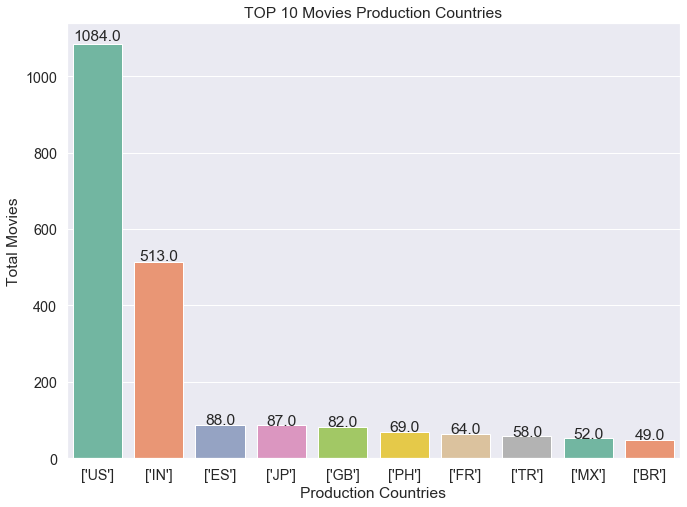

In [ ]:
# The size (height, width) of the figure
plt.figure(figsize = (11, 8))

# Setting the style of the graph and the font size
sns.set(style = "darkgrid", font_scale = 1.3)

# Plotting the bar chart
ax = sns.countplot(x = "production_countries", data = movies_clean, palette = "Set2", order = prodcountries_count.index[:10])

# Title of the graph
plt.title("TOP 10 Movies Production Countries")


# To show the value for each bar in the chart
show_values(ax)

# Title for Axes
plt.ylabel("Total Movies")
plt.xlabel("Production Countries")

plt.show()

The Country with the most movie production is US with a total of 1084 movies producecd followed by India with 513 movies produced

#### Prepare the data for modelling

In [66]:
new_movies = movies[['id', 'title', 'genres']]

In [67]:
new_movies.head()

,id,title,genres
1,tm84618,Taxi Driver,"[""['crime', 'drama']""]"
2,tm127384,Monty Python and the Holy Grail,"[""['comedy', 'fantasy']""]"
3,tm70993,Life of Brian,"[""['comedy']""]"
4,tm190788,The Exorcist,"[""['horror']""]"
6,tm14873,Dirty Harry,"[""['thriller', 'crime', 'action']""]"


# Recommender Systems

## Content-Based Recommendation Engine

I am going to build a Content-Based Recommendation Engine that computes similarity between movies based on movie genres. It will suggest movies that are most similar to a particular movie based on its genre. To do so, I will make use of the file **movies.csv**.

In [68]:
new_movies['genres'].shape

(3759,)

In [69]:
# Break up the big genre string into a string array
new_movies['genres'] = new_movies['genres'].str.split('|')

# Convert genres to string value
new_movies['genres'] = new_movies['genres'].fillna("").astype('str')

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(new_movies['genres'])
tfidf_matrix.shape

(3759, 276)

In [86]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim[:4, :4]

array([[1.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.26639597, 0.        ],
       [0.        , 0.26639597, 1.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ]])

In [87]:
cosine_sim = pd.DataFrame(cosine_sim)

In [ ]:
cosine_sim

In [89]:
# Build a 1-dimensional array with movie titles
titles = new_movies['title']
indices = pd.Series(new_movies.index, index = new_movies['title'])

# Function that get movie recommendations based on the cosine similarity score of movie genres
def genre_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

Let's try and get the top recommendations for a few movies and see how good the recommendations are.

In [90]:
genre_recommendations('Life of Brian')

54      A Nightmare on Elm Street
345                     Halloween
560                      Splatter
750              Hostel: Part III
1057        Dabbe: The Possession
Name: title, dtype: object

In [78]:
genre_recommendations('Monty Python and the Holy Grail')

32                                   Lock Your Girls In
33                  The Witness Who Didn't See Anything
34                               The School of Mischief
75                               Waiting for the Hearse
78    Parrot Sketch Not Included: Twenty Years of Mo...
Name: title, dtype: object

In [79]:
genre_recommendations('Not Another Teen Movie')

333                Deck the Halls
436     Christmas with the Kranks
855             FRED 3: Camp Fred
1377        Pee-wee's Big Holiday
1637          Liar, Liar, Vampire
Name: title, dtype: object

### Saving The Model for Deloployment

Let's Save The Data and The Similarity Scores

In [84]:
pickle.dump(new_movies.to_dict(), open('movie_dict.pkl', 'wb'))

In [91]:
pickle.dump(cosine_sim.to_dict(), open('similarity.pkl', 'wb'))

## Collaborative Filtering Recommendation Model